In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ydata_profiling import ProfileReport

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df= pd.read_csv('Accidentes_Transformado.csv')

In [3]:
df.head()

,Fecha,Hora Declarada,Ruta,Operador,Tipo de Avion,Total a Bordo,Pasajeros a Bordo,Tripulacion a Bordo,Cantidad de Fallecidos,Pasajeros Fallecidos,Tripulantes Fallecidos,Fatalidades en Tierra,Mes,Dia,Año
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0,9.0,17.0,1908.0
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,7.0,1909.0
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0,7.0,12.0,1912.0
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0,8.0,6.0,1913.0
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0,9.0,9.0,1913.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha                   4997 non-null   object 
 1   Hora Declarada          3508 non-null   object 
 2   Ruta                    4991 non-null   object 
 3   Operador                4985 non-null   object 
 4   Tipo de Avion           4981 non-null   object 
 5   Total a Bordo           4990 non-null   float64
 6   Pasajeros a Bordo       4788 non-null   float64
 7   Tripulacion a Bordo     4789 non-null   float64
 8   Cantidad de Fallecidos  4990 non-null   float64
 9   Pasajeros Fallecidos    4771 non-null   float64
 10  Tripulantes Fallecidos  4772 non-null   float64
 11  Fatalidades en Tierra   4957 non-null   float64
 12  Mes                     4987 non-null   float64
 13  Dia                     4986 non-null   float64
 14  Año                     4986 non-null   

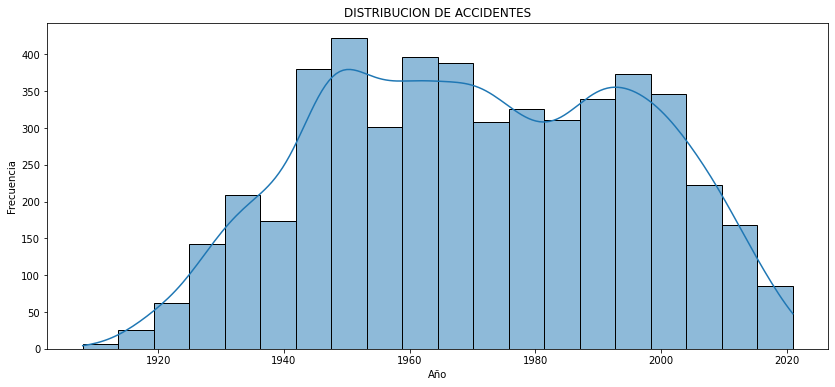

In [5]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='Año', bins=20,kde=True)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('DISTRIBUCION DE ACCIDENTES')
plt.show()

In [40]:
Años = pd.Series(df.Año.value_counts()).sort_index()
px.line(Años, x= Años.index, y= Años.values, title='ACCIDENTES POR AÑO', labels={'index': 'Año', 'y': 'Cantidad de Accidentes'})

Se observa un gran aumento entre 1940 y 1946 producto de la segunda guerra mundial.

In [34]:
Muertes=df.groupby('Año')['Cantidad de Fallecidos'].sum().reset_index()

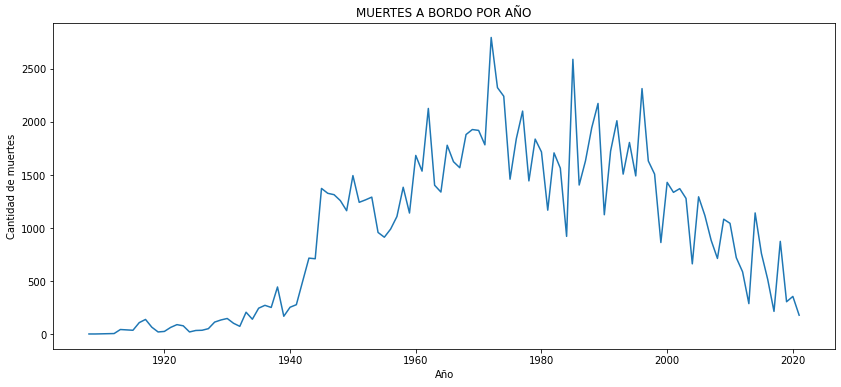

In [41]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=Muertes, x='Año', y='Cantidad de Fallecidos')
plt.xlabel('Año')
plt.ylabel('Cantidad de muertes')
plt.title('MUERTES A BORDO POR AÑO')
plt.show()

In [37]:
Muertes_Tierra=df.groupby('Año')['Fatalidades en Tierra'].sum().reset_index()

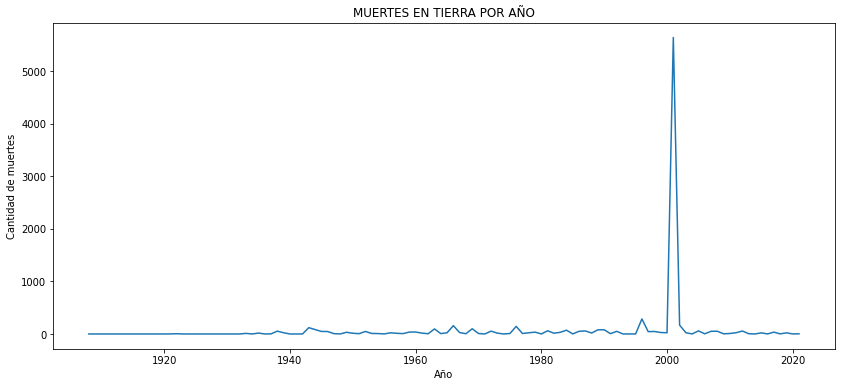

In [42]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=Muertes_Tierra, x='Año', y='Fatalidades en Tierra')
plt.xlabel('Año')
plt.ylabel('Cantidad de muertes')
plt.title('MUERTES EN TIERRA POR AÑO')
plt.show()

Se observa valores atipicos con las fatalidades en tierra en el año 2001, correspondiente al ataque terrorista de las torres gemelas (9/11), en el cual se estrellaron 2 aviones sus las torres.

In [43]:
Tipo_Avion= pd.Series(df['Tipo de Avion'].value_counts())

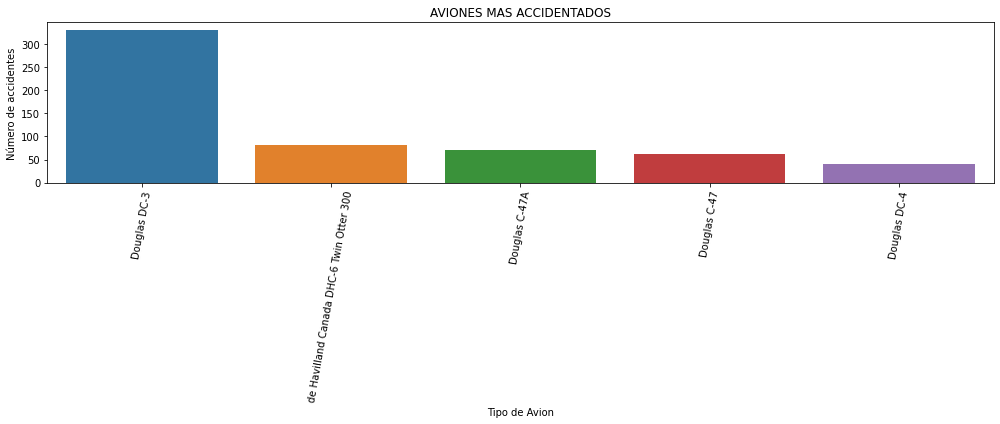

In [45]:
plt.figure(figsize=(14, 6))
Top_5 = df['Tipo de Avion'].value_counts().head(5)
ax = sns.barplot(x=Top_5.index, y=Top_5.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.xlabel('Tipo de Avion')
plt.ylabel('Número de accidentes')
plt.title('AVIONES MAS ACCIDENTADOS')
plt.tight_layout()
plt.show()

Se observa que el modelo Douglas DC-3 es el que más ha tenido accidentes historicamente, este tuvo una gran importancia durante la decada de segunda guerra mundial